# Covid-19 Data Analysis using Python

## Inporting Modules

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Modules are imported.


## Importing Covid-19 Dataset

In [2]:
corona_dataset_csv = pd.read_csv("/kaggle/input/covid19-and-world-happiness-report/covid19_Confirmed_dataset.csv")
corona_dataset_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


In [3]:
corona_dataset_csv.shape

(266, 104)

## Removing columns not needed for the analysis

In [4]:
df = corona_dataset_csv.drop(["Lat", "Long"],axis=1,inplace=True)

In [5]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


## Aggregating rows by country

In [6]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

/tmp/ipykernel_20/3159044292.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()


In [7]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
corona_dataset_aggregated.shape

(187, 100)

## Inital visualization of related data to a sample of coutries. China, Italy and Spain

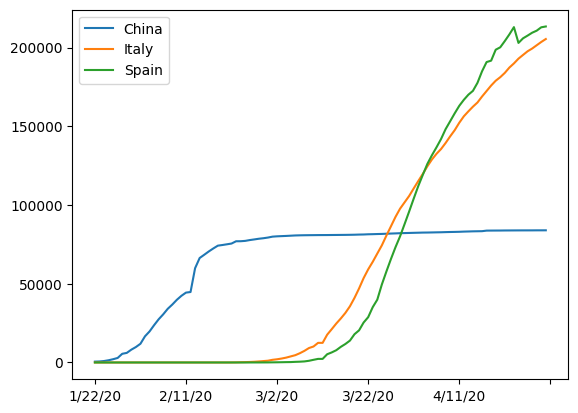

In [9]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()

## Caculating the first derivative of the cure

<AxesSubplot: >

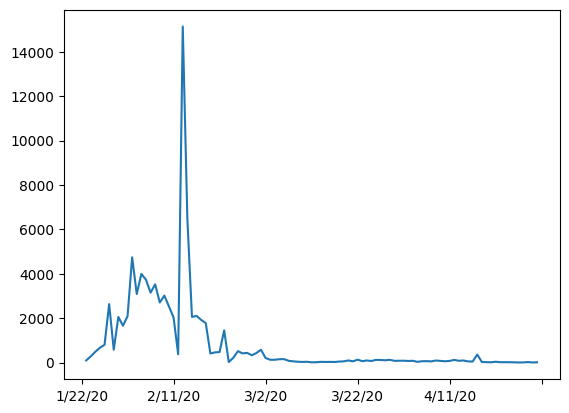

In [10]:
corona_dataset_aggregated.loc["China"].diff().plot()

## Finding maxmimum infection rate for China, Italy and Spain

In [11]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [12]:
corona_dataset_aggregated.loc["Italy"].diff().max()

6557.0

In [13]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

## Using for loop to find the maximum inferction rate for all countries

In [14]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rates"] = max_infection_rates

In [15]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


## Creating a dataframe with relevant columns to the analysis

In [16]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rates"])

In [17]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


## Importing World happiness Dataset

In [18]:
happiness_report_csv = pd.read_csv("/kaggle/input/covid19-and-world-happiness-report/worldwide_happiness_report.csv")

In [19]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Removing columns not needed for the analysis

In [20]:
na_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [21]:
happiness_report_csv.drop(na_cols,axis=1,inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


## Changing the indices of the dataframe

In [22]:
happiness_report_csv.set_index("Country or region",inplace=True)

In [23]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


## Joining the two datasets

### Covid-19 Dataset

In [24]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [25]:
corona_data.shape

(187, 1)

### World happiness report Dataset

In [26]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [27]:
happiness_report_csv.shape

(156, 4)

In [28]:
data = corona_data.join(happiness_report_csv,how="inner")
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


## Correlation matirx for inital insights

In [29]:
data.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Visualization of the results

In [30]:
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


## Plotting GDP vs maximum infection rates

<AxesSubplot: xlabel='GDP per capita', ylabel='max_infection_rates'>

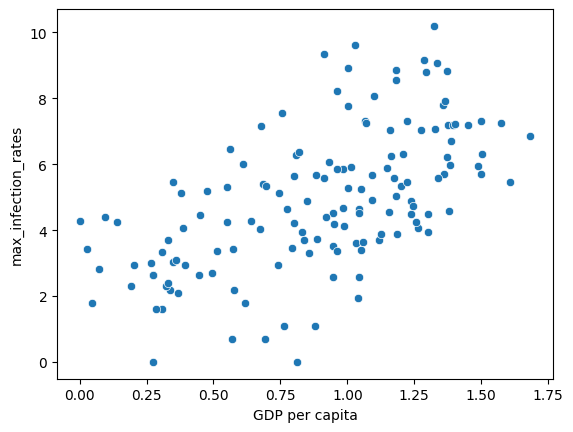

In [31]:
sns.scatterplot(x="GDP per capita", y=np.log(data["max_infection_rates"]), data=data)

<AxesSubplot: xlabel='GDP per capita', ylabel='max_infection_rates'>

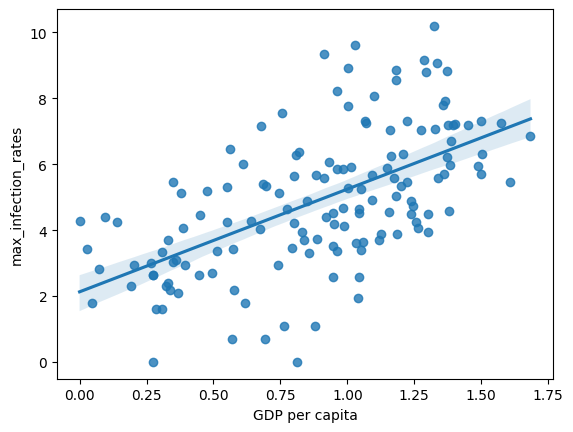

In [32]:
sns.regplot(x="GDP per capita", y=np.log(data["max_infection_rates"]), data=data)

## Plotting Social support vs maximum infection rates

<AxesSubplot: xlabel='Social support', ylabel='max_infection_rates'>

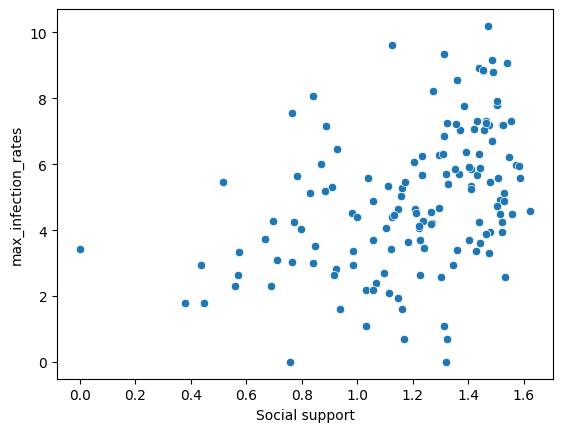

In [33]:
sns.scatterplot(x="Social support", y=np.log(data["max_infection_rates"]), data=data)

<AxesSubplot: xlabel='Social support', ylabel='max_infection_rates'>

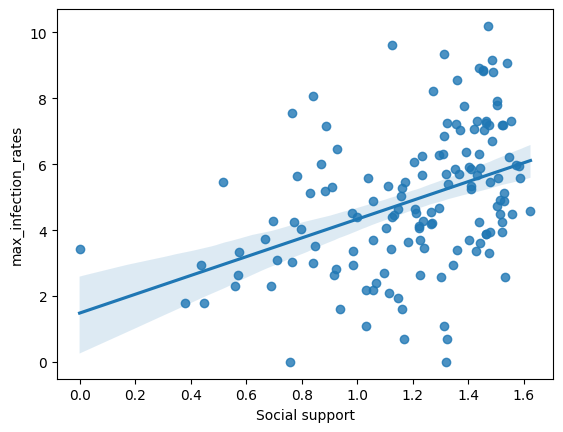

In [34]:
sns.regplot(x="Social support", y=np.log(data["max_infection_rates"]), data=data)

## Plotting Healthy life expectancy vs maximum infection rates

<AxesSubplot: xlabel='Healthy life expectancy', ylabel='max_infection_rates'>

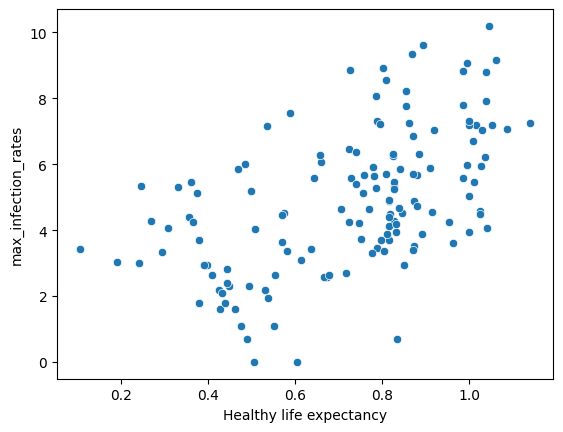

In [35]:
sns.scatterplot(x="Healthy life expectancy", y=np.log(data["max_infection_rates"]), data=data)

<AxesSubplot: xlabel='Healthy life expectancy', ylabel='max_infection_rates'>

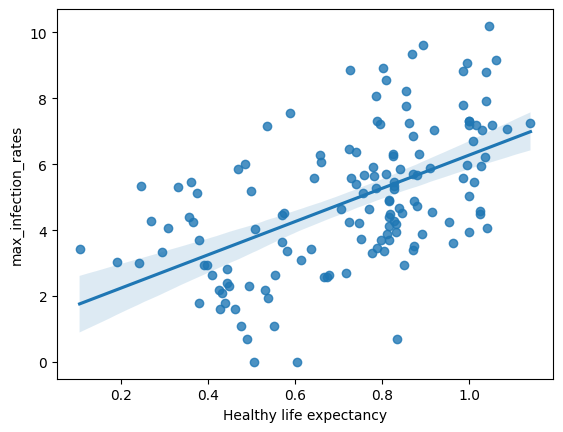

In [36]:
sns.regplot(x="Healthy life expectancy", y=np.log(data["max_infection_rates"]), data=data)

## Plotting Freedom to make life choices vs maximum infection rates

<AxesSubplot: xlabel='Freedom to make life choices', ylabel='max_infection_rates'>

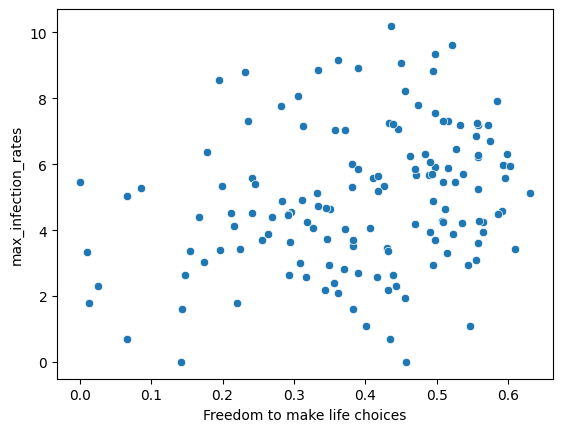

In [37]:
sns.scatterplot(x="Freedom to make life choices", y=np.log(data["max_infection_rates"]), data=data)

<AxesSubplot: xlabel='Freedom to make life choices', ylabel='max_infection_rates'>

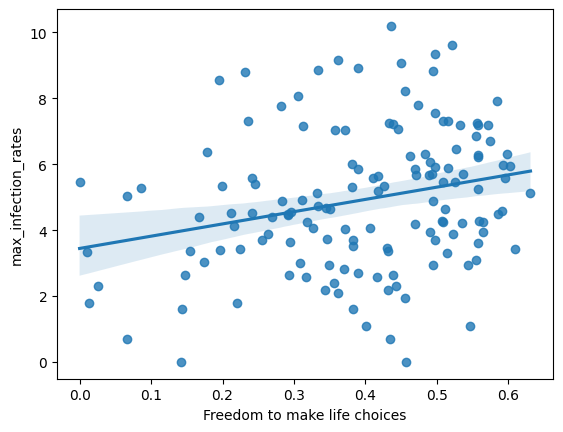

In [38]:
sns.regplot(x="Freedom to make life choices", y=np.log(data["max_infection_rates"]), data=data)

## Inital Findings

Results from this inital analysis shows that people who are living in more developed coutries are more prone to getting the infrection of Covid-19 compared to less eveloped countires

## Futher Analysis

To confirm if the inital analysis is correct I need to compare and comfirm that it is not being represented due to lack of test Covid-19 Test kits in the less develpoed coutries.

In order to prove that this is not the case I will complete futher anaylisis where I will use a dataset related to cumulative number of deaths instead of confimed Covid-19 cases.